In [1]:
import obspy
import warnings
from obspy.clients.fdsn import Client
from obspy import UTCDateTime, Stream
import matplotlib.pyplot as plt

import cartopy
import cartopy.crs as ccrs
import numpy as np

from matplotlib.image import imread
import os

In [4]:
starttime = UTCDateTime(2022, 11, 28)
endtime = starttime +  60 * 60 * 24

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    inventory = client.get_stations(latitude=19.4721, longitude=-155.5922, network='HV', 
                                    level='channel', channel='H*', maxradius=.25, startbefore=starttime, endafter=endtime)
    # Max radius of .25° is to make sure that the channels we get are from Kalauea and not Mauna Loa instruments
    # Because Mauna Loa is approximately .366° away from Kilauea
inventory

NameError: name 'client' is not defined

In [6]:
print(Client)

<class 'obspy.clients.fdsn.client.Client'>


/Users/zacharymathias/opt/anaconda3/envs/GPGN268/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


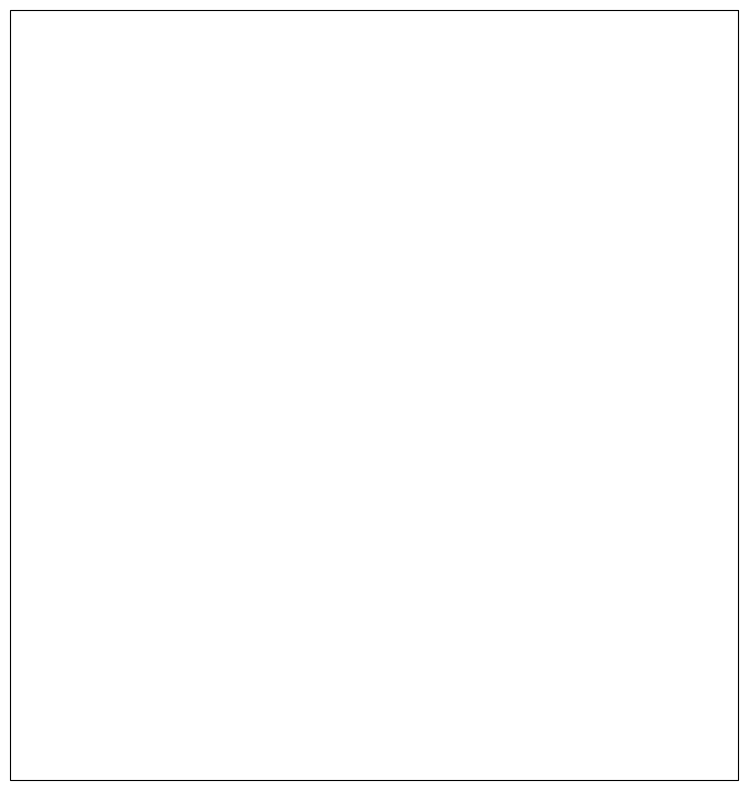

In [10]:
central_lon, central_lat = 155, 20

extent = [154, 156, 19, 21]


proj = ccrs.Orthographic(central_lon, central_lat)
ccrs.Orthographic(central_lon, central_lat)
plt.figure(figsize=(10,10))

ax = plt.axes(projection=proj)#, figsize=(12,8))


ax.set_extent(extent)
ax.coastlines()

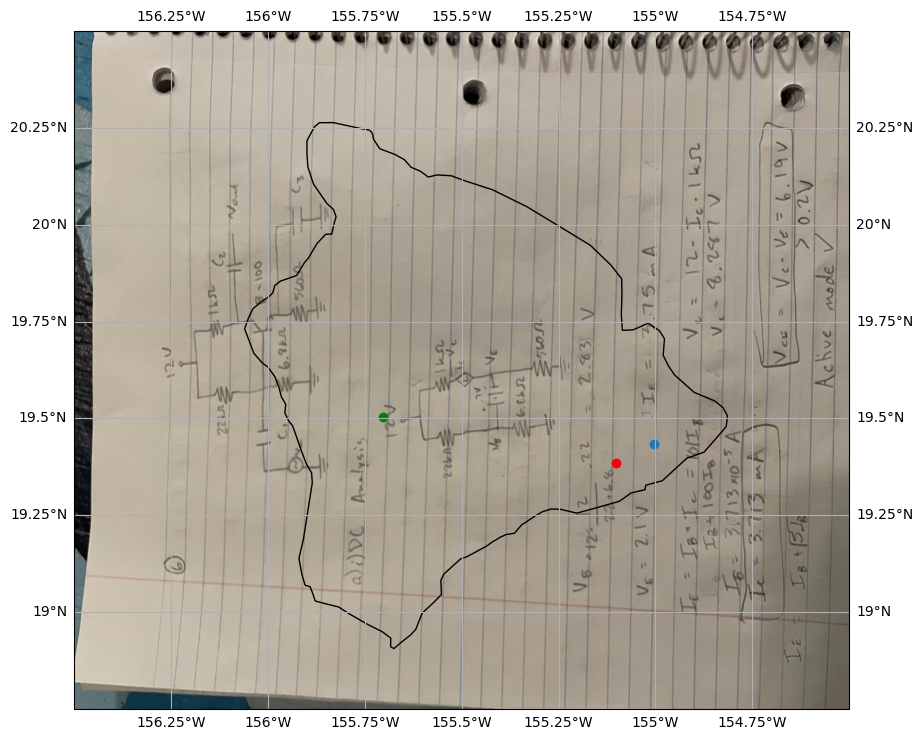

In [35]:
central_lon, central_lat = -155, 20
extent = [-156.5, -154.5, 18.75, 20.5]

#ortho = ccrs.Orthographic(central_lon, central_lat)
plt.figure(figsize=(10,10))

plate = ccrs.PlateCarree()

ax = plt.axes(projection=plate)
ax.set_extent(extent)
ax.gridlines(draw_labels=True)
ax.coastlines(resolution='10m')

lat = np.array([19.433613, 19.384045, 19.504323, 19.5])
long = np.array([-155.004449, -155.101578, -155.702741, -155])
geo = ccrs.Geodetic()
#alber = ccrs.AlbersEqualArea()
#points = ortho.transform_points(geo, long, lat)

#ax.plot?
ax.plot(long[0], lat[0], marker="o")# markersize=8, color="red")
ax.plot(long[1], lat[1], marker = 'o', color='red')
ax.plot(long[2], lat[2], marker = 'o', color = 'green')


ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')


#fname = './IMG_0745.jpeg'
#os.path.join?
#(config["repo_data_dir"],
                     #'raster', 'natural_earth', '50-natural-earth-1-downsampled.png')
#img = imread(fname)

ax.imshow(img, origin='upper', transform=ccrs.PlateCarree(), extent=extent)

plt.show()

In [184]:
points = plate.transform_points(ortho, long, lat)

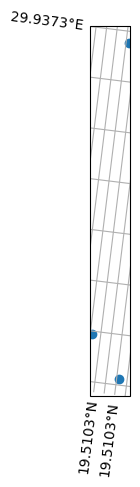

In [185]:
proj = ccrs.AlbersEqualArea(central_lon, central_lat)
ax = plt.axes(projection=proj)
#ax.set_extent(extent)
ax.coastlines()
ax.gridlines(draw_labels=True)

points = alber.transform_points(ortho, long, lat)
ax.scatter(points[:, 0], points[:,1])


<urlopen error [Errno 8] nodename nor servname provided, or not known>


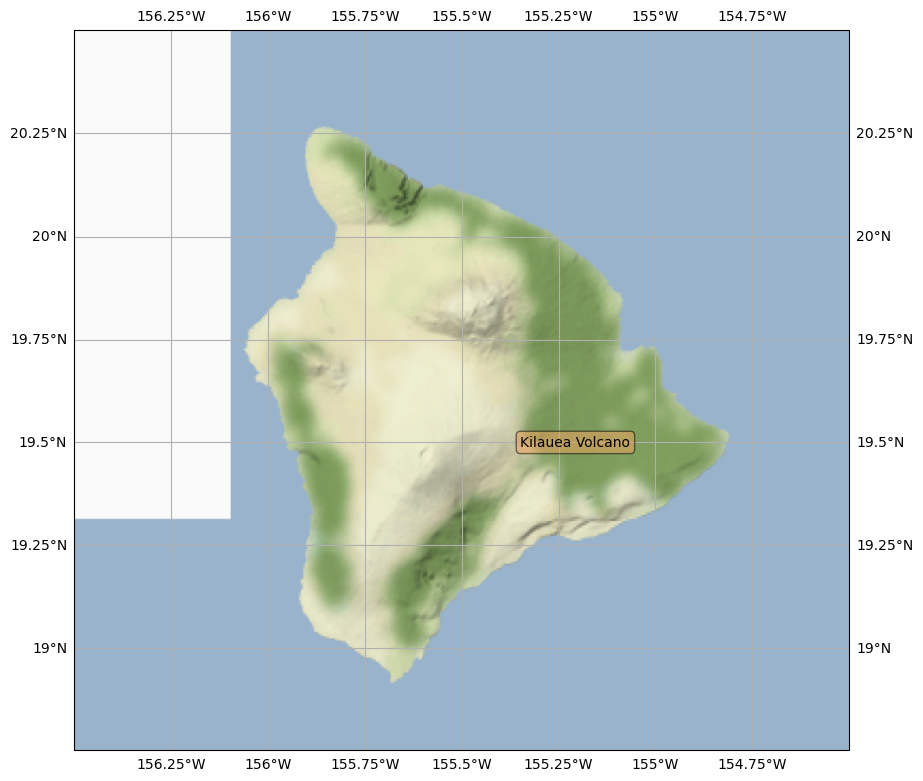

In [28]:
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt


#def main():
# Create a Stamen terrain background instance.
stamen_terrain = cimgt.Stamen('terrain-background')

fig = plt.figure(figsize=(10,10))

# Create a GeoAxes in the tile's projection.
ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)
#ax = plt.plot(fig, projection=ccrs.PlateCarree())

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent(extent, crs=ccrs.Geodetic())

# Add the Stamen data at zoom level 8.
ax.add_image(stamen_terrain, 8)

# Add a marker for the Kilauea volcano.
ax.plot(19.4069, -155.2834, marker='o', color='red', markersize=12,
        alpha=0.7, transform=ccrs.Geodetic())

# Use the cartopy interface to create a matplotlib transform object
# for the Geodetic coordinate system. We will use this along with
# matplotlib's offset_copy function to define a coordinate system which
# translates the text by 25 pixels to the left.
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

# Add text 25 pixels to the left of the volcano.
ax.text(-155, 19.5, 'Kilauea Volcano',
        verticalalignment='center', horizontalalignment='right',
        transform=text_transform,
        bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))

ax.gridlines(draw_labels=True)

#ax.plot(long[0], lat[0], marker='o', color='blue')
#ax.plot(long[1], lat[1], marker = 'o', color='red')
#ax.plot(long[2], lat[2], marker = 'o', color = 'green')

plt.show()

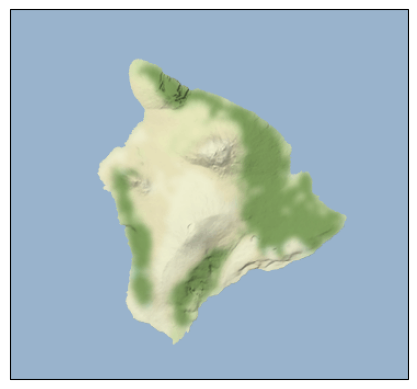

In [160]:
main()

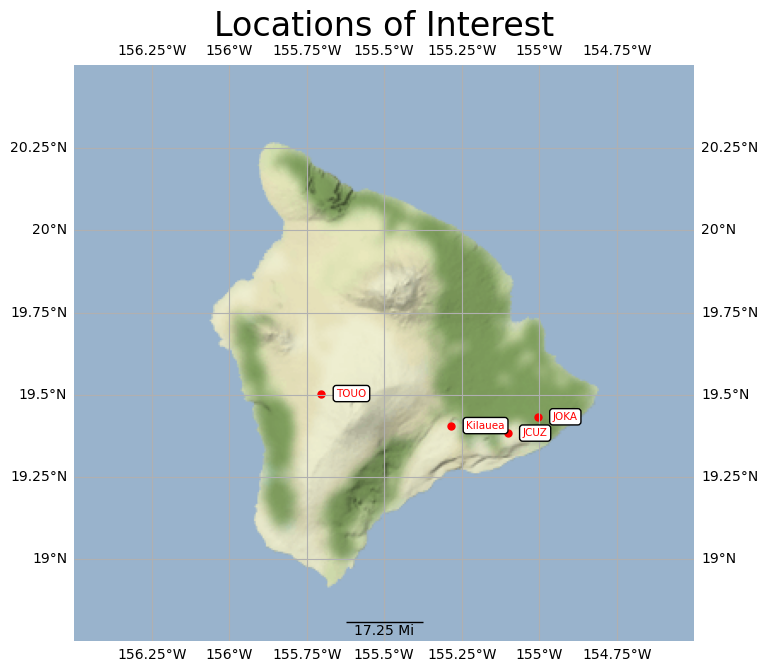

In [101]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Define the map projection
proj = ccrs.PlateCarree()

# Create a new figure
fig = plt.figure(figsize=(8, 8))
#ax = fig.add_subplot(1, 1, 1, projection=proj)
ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)

# Plot the stations on the map
ax.plot(long, lat, 'ro', markersize=5, transform=proj)
ax.add_image(stamen_terrain, 8)
# Set the extent of the map to focus on the Big Island of Hawaii
ax.set_extent(extent, crs=proj)

# Show gridlines
ax.gridlines(draw_labels=True)
'''
ax.text(-155, 19.5, 'Kilauea Volcano',
        verticalalignment='center', horizontalalignment='right',
        transform=text_transform,
        bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))
'''



lat = np.array([19.433613, 19.384045, 19.504323, 19.4069])
long = np.array([-155.004449, -155.101578, -155.702741, -155.2834])

# 
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=15)


kilauea_lon, kilauea_lat = long[-1], lat[-1]
ax.text(kilauea_lon, kilauea_lat, 'Kilauea', transform=text_transform,
        ha='left', va='center', color='red',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), size=7.5)

JCUZlong, JCUZlat = long[1], lat[1]
ax.text(JCUZlong, JCUZlat, 'JCUZ', transform=text_transform,
        ha='left', va='center', color='red',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), size=7.5)

JOKAlong, JOKAlat = long[0], lat[0]
ax.text(JOKAlong, JOKAlat, 'JOKA', transform=text_transform,
        ha='left', va='center', color='red',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), size=7.5)

TOUOlong, TOUOlat = long[2], lat[2]
ax.text(TOUOlong, TOUOlat, 'TOUO', transform=text_transform,
        ha='left', va='center', color='red',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), size=7.5)


# Add a title to the map
ax.set_title('Locations of Interest', fontsize=24)


from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar


#plt.rcParams["figure.figsize"] = [7.50, 3.50]
#plt.rcParams["figure.autolayout"] = True

#data = np.random.rand(5, 5)

#img = plt.imshow(data, cmap="YlGnBu")
ab = plt.gca()
scalebar = AnchoredSizeBar(ab.transData, 27750, "17.25 Mi", 'lower center', frameon=False)

ax.add_artist(scalebar)
ax.axis('off')
plt.show()

# Show the map
plt.show()

In [87]:
print(ab.transData)

CompositeGenericTransform(
    TransformWrapper(
        BlendedAffine2D(
            IdentityTransform(),
            IdentityTransform())),
    CompositeGenericTransform(
        BboxTransformFrom(
            TransformedBbox(
                Bbox(x0=-17421500.30914738, y0=2125524.4614164145, x1=-17198861.32756083, y1=2332357.81261934),
                TransformWrapper(
                    BlendedAffine2D(
                        IdentityTransform(),
                        IdentityTransform())))),
        BboxTransformTo(
            TransformedBbox(
                Bbox(x0=0.125, y0=0.13500947623820886, x1=0.9, y1=0.8549905237617912),
                BboxTransformTo(
                    TransformedBbox(
                        Bbox(x0=0.0, y0=0.0, x1=8.0, y1=8.0),
                        Affine2D().scale(100.0)))))))


In [89]:
AnchoredSizeBar?

Init signature:
AnchoredSizeBar(
    transform,
    size,
    label,
    loc,
    pad=0.1,
    borderpad=0.1,
    sep=2,
    frameon=True,
    size_vertical=0,
    color='black',
    label_top=False,
    fontproperties=None,
    fill_bar=None,
    **kwargs,
)
Docstring:     
An offset box placed according to location *loc*.

AnchoredOffsetbox has a single child.  When multiple children are needed,
use an extra OffsetBox to enclose them.  By default, the offset box is
anchored against its parent axes. You may explicitly specify the
*bbox_to_anchor*.
Init docstring:
Draw a horizontal scale bar with a center-aligned label underneath.

Parameters
----------
transform : `~matplotlib.transforms.Transform`
    The transformation object for the coordinate system in use, i.e.,
    :attr:`matplotlib.axes.Axes.transData`.
size : float
    Horizontal length of the size bar, given in coordinates of
    *transform*.
label : str
    Label to display.
loc : str
    Location of the size bar.  Valid loc